In [2]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In the IMDB dataset, movie reviews are labeled with both positive and negative sentiment.

Each review is converted into a set of word embeddings as part of the dataset's preparation, where each word is represented by a fixed-size vector.

In [3]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

custom-trained embedding layer with training sample size = 100

In [4]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - acc: 0.5695 - loss: 0.6905 - val_acc: 0.7000 - val_loss: 0.6907
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8617 - loss: 0.6679 - val_acc: 0.6500 - val_loss: 0.6915
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9469 - loss: 0.6465 - val_acc: 0.6500 - val_loss: 0.6914
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9516 - loss: 0.6291 - val_acc: 0.6000 - val_loss: 0.6917
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9438 - loss: 0.6146 - val_acc: 0.6000 - val_loss: 0.6921
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9492 - loss: 0.5940 - val_acc: 0.6000 - val_loss: 0.6912
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9719 - loss: 0.5813 - val_acc: 0.6500 - val_loss: 0.6916
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9719 - loss: 0.5629 - val_acc: 0.6500 - val_loss: 0.6906
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9797 - loss: 0.5412 -

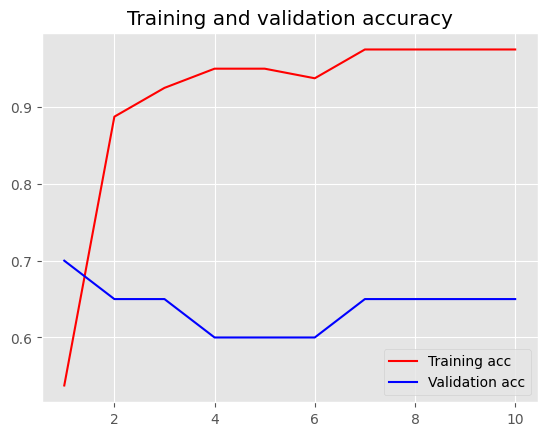

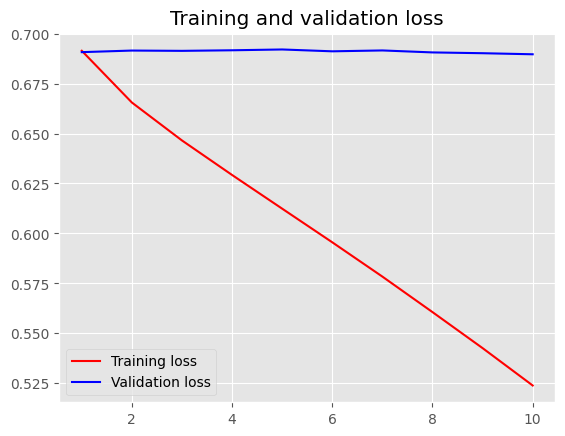

In [5]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [6]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5010 - loss: 0.6950
Test loss: 0.6956439018249512
Test accuracy: 0.4987199902534485


In [7]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [8]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.4994 - loss: 0.6928 - val_acc: 0.5790 - val_loss: 0.6861
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7308 - loss: 0.6683 - val_acc: 0.7030 - val_loss: 0.6543
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8192 - loss: 0.5992 - val_acc: 0.7340 - val_loss: 0.5867
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8600 - loss: 0.4881 - val_acc: 0.7910 - val_loss: 0.5052
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8975 - loss: 0.3729 - val_acc: 0.8020 - val_loss: 0.4572
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9269 - loss: 0.2892 - val_acc: 0.8160 - val_loss: 0.4208
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9402 - loss: 0.2367 - val_acc: 0.8120 - val_loss: 0.4067
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9547 - loss: 0.1868 - val_acc: 0.8160 - val_loss: 0.3948
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

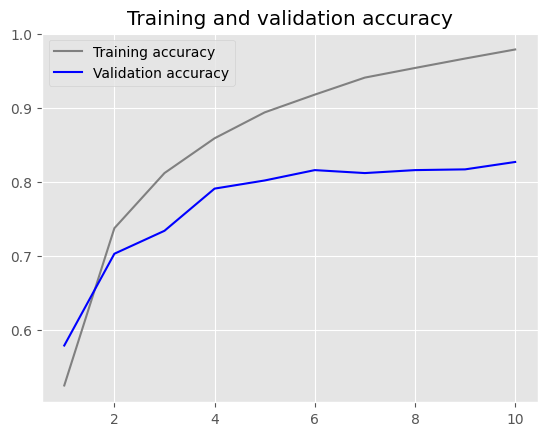

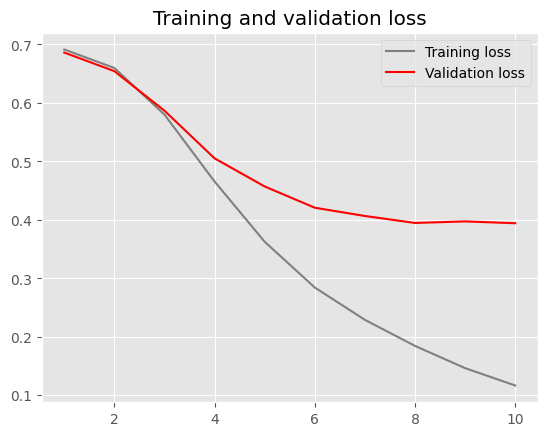

In [9]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8340 - loss: 0.3710
Test loss: 0.3714998960494995
Test accuracy: 0.8329200148582458


custom-trained embedding layer with training sample size = 1000

In [11]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [12]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.5040 - loss: 0.6935 - val_acc: 0.4650 - val_loss: 0.6929
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7659 - loss: 0.6763 - val_acc: 0.4950 - val_loss: 0.6918
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8625 - loss: 0.6602 - val_acc: 0.4950 - val_loss: 0.6901
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9346 - loss: 0.6357 - val_acc: 0.5300 - val_loss: 0.6883
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9633 - loss: 0.6122 - val_acc: 0.5400 - val_loss: 0.6861
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9651 - loss: 0.5794 - val_acc: 0.5600 - val_loss: 0.6830
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9641 - loss: 0.5412 - val_acc: 0.5700 - val_loss: 0.6795
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9635 - loss: 0.5032 - val_acc: 0.5950 - val_loss: 0.6756
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9711 - loss:

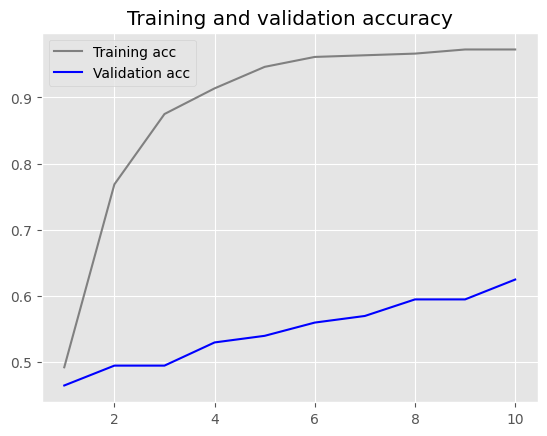

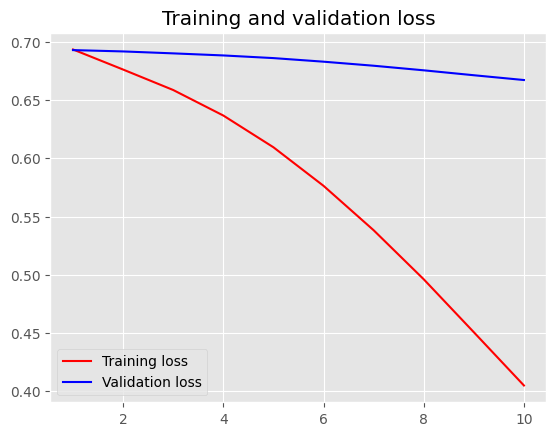

In [13]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [14]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5917 - loss: 0.6731
Test loss: 0.6730301380157471
Test accuracy: 0.5887200236320496


custom-trained embedding layer with training sample size = 10000

In [15]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [16]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.5143 - loss: 0.6917 - val_acc: 0.7040 - val_loss: 0.6568
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7723 - loss: 0.6018 - val_acc: 0.8055 - val_loss: 0.4826
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8510 - loss: 0.4150 - val_acc: 0.8340 - val_loss: 0.3807
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8854 - loss: 0.3135 - val_acc: 0.8625 - val_loss: 0.3378
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9072 - loss: 0.2556 - val_acc: 0.8710 - val_loss: 0.3214
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9344 - loss: 0.1999 - val_acc: 0.8585 - val_loss: 0.3294
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9428 - loss: 0.1749 - val_acc: 0.8595 - val_loss: 0.3316
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9574 - loss: 0.1454 - val_acc: 0.8545 - val_loss: 0.3334
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

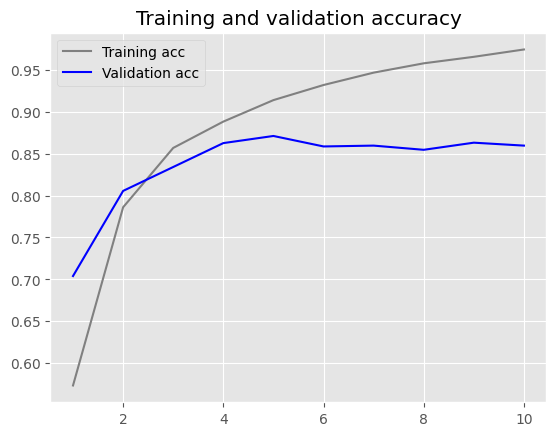

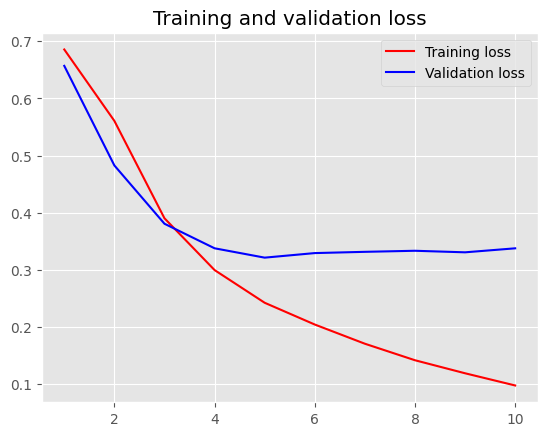

In [17]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [18]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8519 - loss: 0.3512
Test loss: 0.3454275131225586
Test accuracy: 0.853879988193512


In [19]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  1458k      0  0:00:56  0:00:56 --:--:-- 3306k


In [20]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Making Use of Trained Word Embeds Pretrained word embeddings can be used if there is insufficient training data to obtain word embeddings along with the problem you want to tackle.


Tokenizing the data

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150  # Cut off review after 150 words
train_data = 100  # Training sample 100
valid_data = 10000  # Validation sample 10000
words = 10000  # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [22]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


We trained the 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.



Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [23]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension based on matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size based on matrix

# Define the model with an Embedding layer initialized with the embedding matrix
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False  # Set trainable to False directly if you want it non-trainable
    )
)

# Check the model summary to confirm the embedding layer has loaded weights
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension from matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size from matrix

# Define the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())  # Reduces 3D tensor to 2D
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model.save_weights('pre_trained_glove_model.weights.h5')



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step - acc: 0.4248 - loss: 0.7273 - val_acc: 0.5095 - val_loss: 0.6960
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - acc: 0.4456 - loss: 0.7056 - val_acc: 0.5077 - val_loss: 0.6949
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - acc: 0.4196 - loss: 0.7059 - val_acc: 0.5080 - val_loss: 0.6943
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - acc: 0.3803 - loss: 0.7056 - val_acc: 0.5118 - val_loss: 0.6938
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 0.4932 - loss: 0.6964 - val_acc: 0.5145 - val_loss: 0.6934
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 0.4453 - loss: 0.6996 - val_acc: 0.5168 - val_loss: 0.6931
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - acc: 0.4606 - loss: 0.6998 - val_acc: 0.5199 - val_loss: 0.6928
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 0.5250 - loss: 0.6930 - val_acc: 0.4951 - val_loss: 0.6936
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - acc: 0.5440 - loss: 

Pretrained word embedding is loaded into the Embeddig layer. When invoking the Embedding layer, setting this to False ensures that it is not trainable. It will be possible for the optimization method to change the word embedding values if you set trainable = True. It is best to avoid updating pretrained sections while students are still being trained to prevent them from forgetting what they already "know".

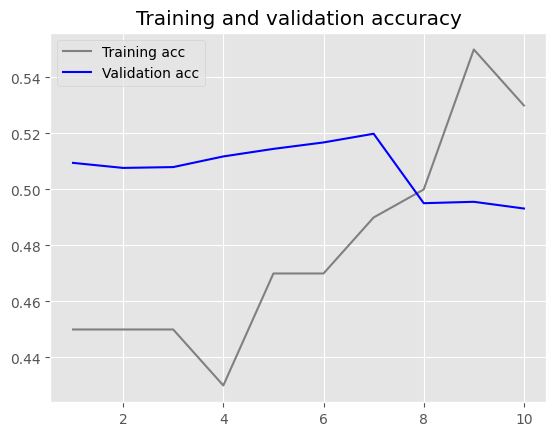

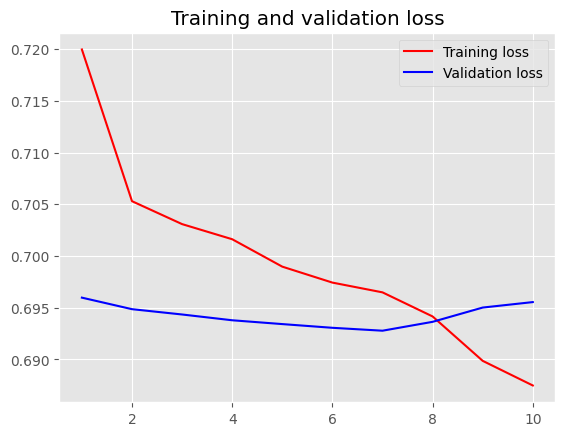

In [27]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4921 - loss: 0.6960
Test loss: 0.6950082182884216
Test accuracy: 0.49983999133110046


pretrained word embedding layer with training sample size = 5000

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Build the model explicitly by specifying an input shape
model11.build(input_shape=(None, length2))

# Load pretrained weights
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile and fit the model
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - acc: 0.5879 - loss: 2.3045 - val_acc: 0.5108 - val_loss: 0.6972
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - acc: 0.5943 - loss: 0.5890 - val_acc: 0.4940 - val_loss: 1.4554
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - acc: 0.6998 - loss: 0.6662 - val_acc: 0.5099 - val_loss: 1.0756
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - acc: 0.8240 - loss: 0.3925 - val_acc: 0.5363 - val_loss: 0.7439
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - acc: 1.0000 - loss: 0.1871 - val_acc: 0.5378 - val_loss: 0.7633
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - acc: 0.9816 - loss: 0.1711 - val_acc: 0.5229 - val_loss: 0.9909
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.9845 - loss: 0.1396 - val_acc: 0.5550 - val_loss: 0.7237
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - acc: 1.0000 - loss: 0.0630 - val_acc: 0.4941 - val_loss: 1.7943
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - acc: 0.9382 - loss: 

In [30]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4882 - loss: 0.8811
Test loss: 0.8702600002288818
Test accuracy: 0.4989599883556366


pretrained word embedding layer with training sample size = 1000

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [34]:
# Force the embedding layer to build its weights by calling build()
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9614 - loss: 0.1330 - val_acc: 0.5048 - val_loss: 1.4204
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9832 - loss: 0.0684 - val_acc: 0.5000 - val_loss: 1.6703
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9781 - loss: 0.0627 - val_acc: 0.5033 - val_loss: 1.5410
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9888 - loss: 0.0375 - val_acc: 0.5028 - val_loss: 2.0001
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9825 - loss: 0.0529 - val_acc: 0.5011 - val_loss: 1.8913
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9937 - loss: 0.0282 - val_acc: 0.4975 - val_loss: 1.8595
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9885 - loss: 0.0373 - val_acc: 0.5048 - val_loss: 1.9159
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9904 - loss: 0.0300 - val_acc: 0.5020 - val_loss: 1.9888
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

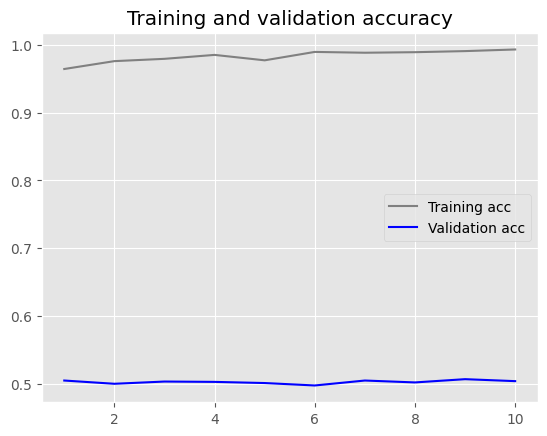

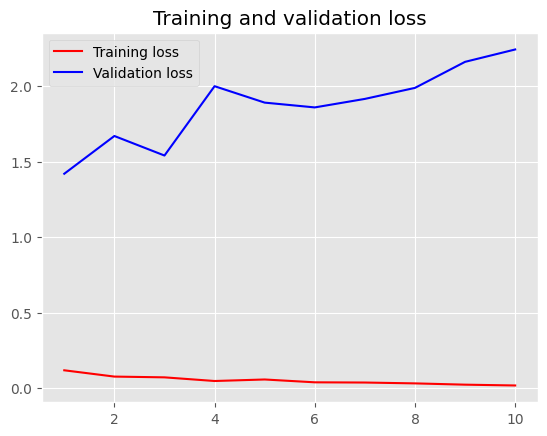

In [39]:
# Build the embedding layer to initialize weights
model11.layers[0].build(input_shape=(None, length2))

# Set the pre-trained embedding matrix as weights for the embedding layer
model11.layers[0].set_weights([embedd_matrix])
model11.layers[0].trainable = False

# Compile the model
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights with the required file name
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plotting training and validation results
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [42]:
# Evaluate the model
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)

# Print test loss and accuracy
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5000 - loss: 2.2910
Test loss: 2.2578394412994385
Test accuracy: 0.5048800110816956


pretrained word embedding layer with training sample size = 10000

In [44]:
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)  # Use pre-defined validation data
)
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2  # Use 20% of training data for validation
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.5054 - loss: 1.0367 - val_acc: 0.4994 - val_loss: 0.6931
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5041 - loss: 0.7006 - val_acc: 0.4994 - val_loss: 0.7068
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5591 - loss: 0.6824 - val_acc: 0.4993 - val_loss: 0.6988
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6409 - loss: 0.6361 - val_acc: 0.4989 - val_loss: 0.8825
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7562 - loss: 0.5382 - val_acc: 0.5030 - val_loss: 1.0139
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8118 - loss: 0.4455 - val_acc: 0.4980 - val_loss: 1.0167
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8693 - loss: 0.3584 - val_acc: 0.4993 - val_loss: 0.9458
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9052 - loss: 0.2782 - val_acc: 0.5020 - val_loss: 0.9679
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

In [45]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4992 - loss: 1.9389
Test loss: 1.9288406372070312
Test accuracy: 0.4992400109767914
